In [8]:
import numpy as np
import scipy.stats as sps
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
reload(gaussian_mixture_anomaly_detection)

<module 'gaussian_mixture_anomaly_detection' from '/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py'>

In [51]:
import gaussian_mixture_anomaly_detection
from gaussian_mixture_anomaly_detection import GaussianMixtureInTimeAnomalyDetector
from gaussian_mixture_anomaly_detection import extract_anomaly_target, smoothed_sample_anomalies

простой пример: 10 двумерных временных рядов по 10 элементов в каждом,лежащие на 3x=2y со случайным нормальным смещением, а также 4 аномальные точки

In [2]:
T = 10
F = 40
N = 2

data = np.zeros((F, T, N))

for i in range(F):
    for t in range(T):
        data[i][t] = np.array([2,3]) * t + sps.norm.rvs(size=2,scale=0.5)
        
anomalies = [(0,5,0), (1,3,1), (1,4,1), (2,8,1), (3,2,0)]
for a in anomalies:
    data[a[0]][a[1]][a[2]] += 5

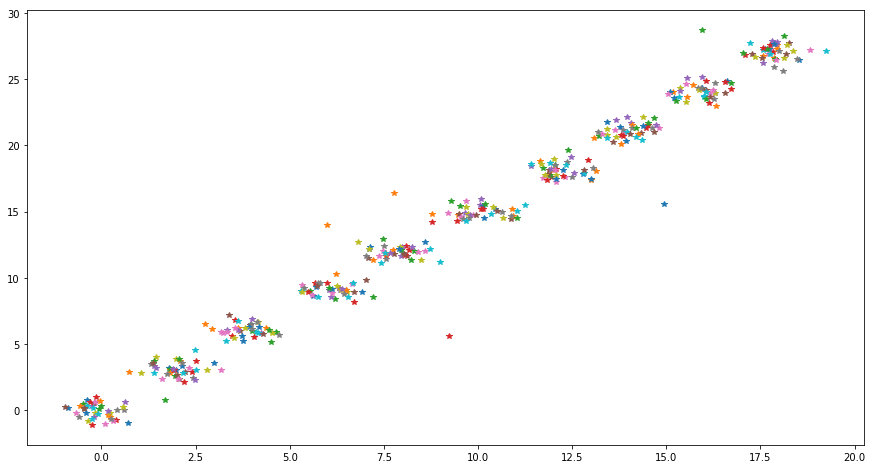

In [3]:
plt.figure(figsize=(15,8))
for i in range(F):
    plt.plot(data[i][:, 0], data[i][:, 1], '*')
# plt.grid()
plt.show()

In [4]:
detector = GaussianMixtureInTimeAnomalyDetector(n_components=10, random_state=1)

In [5]:
scores = detector.fit(data)  # scores  - логарифмическое правдоподобие нормальности для каждого сэмпла

Sample clusters fitting - OK.
100%|██████████| 40/40 [00:00<00:00, 407.56it/s]
Probabilities memorization - OK.


выявление аномальных сэмплов:

In [6]:
detector.find_anomalies(scores, log_likelihood_threshold=0)

([(-22.686233274822207, (3, 2)),
  (-17.354057778594786, (0, 5)),
  (-12.59220645018406, (1, 3)),
  (-10.735407137946092, (2, 8)),
  (-9.666569314935535, (1, 4)),
  (-6.550197092031105, (32, 0)),
  (-0.4521648895322973, (9, 9)),
  (-0.20921752393178447, (29, 1)),
  (-0.20665720609979402, (29, 4))],
 0)

In [7]:
detector.find_anomalies(scores, anomaly_top=0.05)

([(-22.686233274822207, (3, 2)),
  (-17.354057778594786, (0, 5)),
  (-12.59220645018406, (1, 3)),
  (-10.735407137946092, (2, 8)),
  (-9.666569314935535, (1, 4)),
  (-6.550197092031105, (32, 0)),
  (-0.4521648895322973, (9, 9)),
  (-0.20921752393178447, (29, 1)),
  (-0.20665720609979402, (29, 4)),
  (0.0054094276327495555, (25, 2)),
  (0.08717009362934496, (31, 1)),
  (0.11401224087214276, (30, 0)),
  (0.15301454211142915, (37, 9)),
  (0.18882203789807006, (32, 6)),
  (0.2781482937763096, (26, 1)),
  (0.29514056790868304, (13, 5)),
  (0.39557009200897336, (11, 2)),
  (0.7212230421317074, (22, 7)),
  (0.7527203933593213, (31, 8)),
  (0.7611548515779801, (22, 2)),
  (0.8329682717585967, (30, 1))],
 0.8329682717585967)

как видно аномалии попали в топ 5%

In [8]:
detector.find_anomalies(scores, anomaly_top=0.1, strategy='series')

([(-3.9089617994354815, 1),
  (-2.8767035173813835, 3),
  (5.559567055894446, 0),
  (10.808570837923583, 2),
  (13.92899277762048, 32)],
 13.92899277762048)

2 ряда с добавленными аномалиями попали в топ по сумме логорифимических правдоподобий

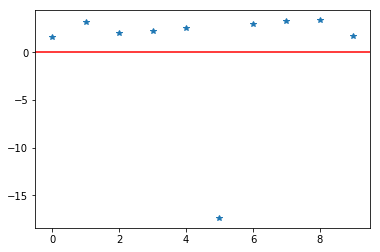

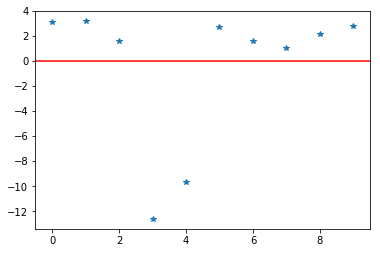

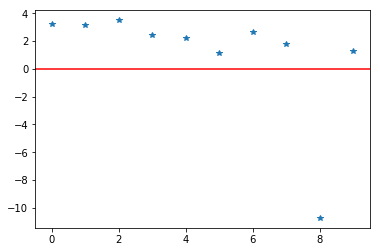

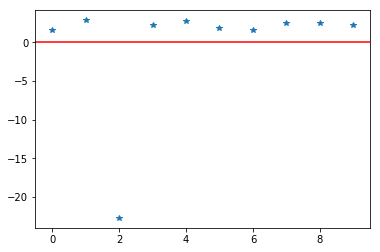

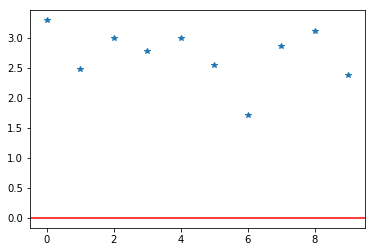

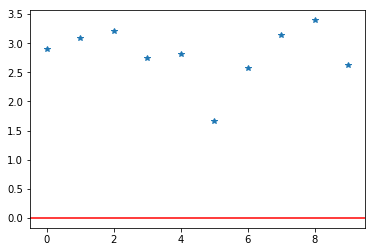

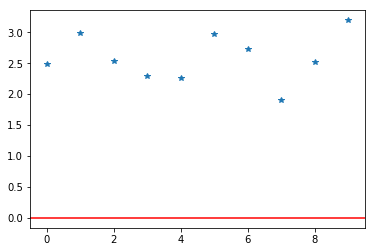

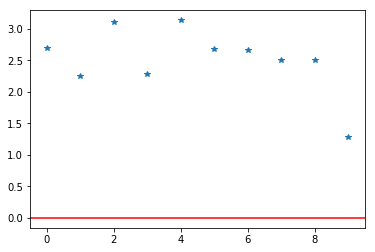

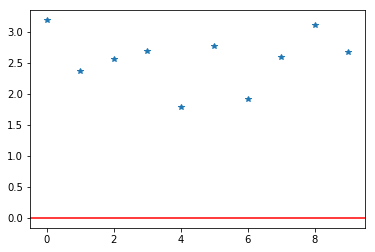

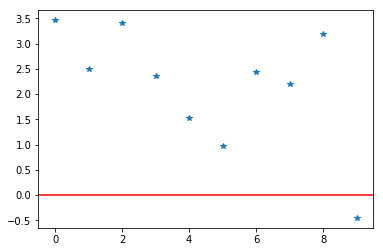

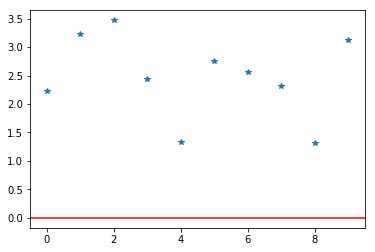

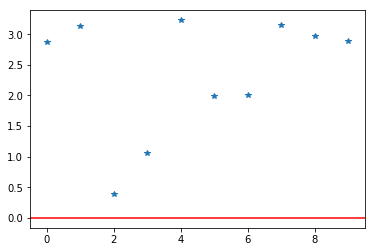

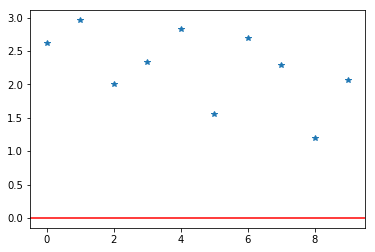

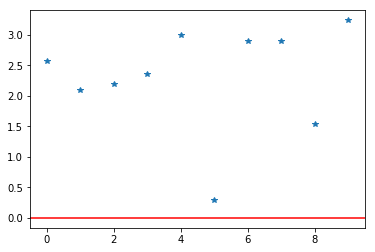

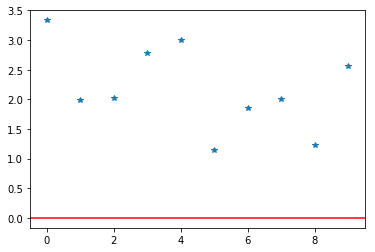

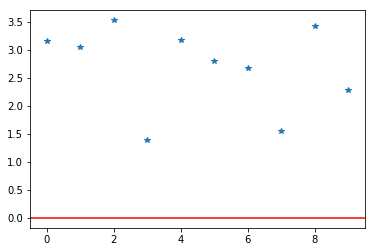

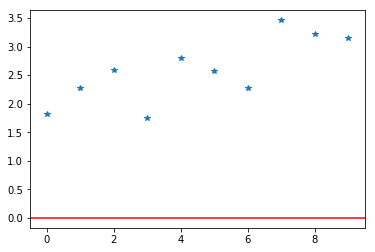

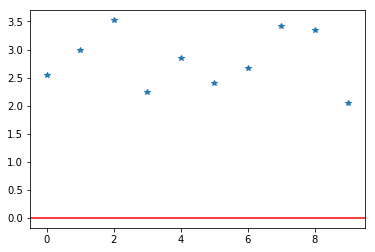

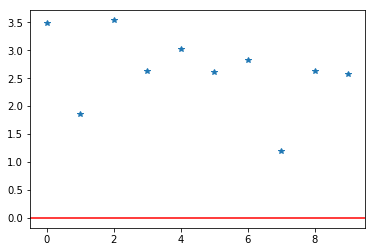

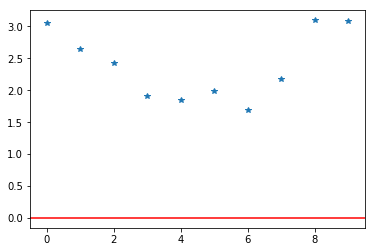

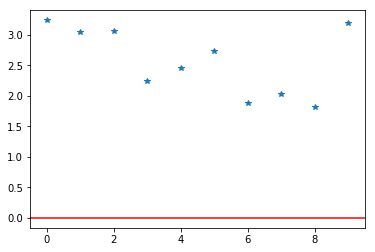

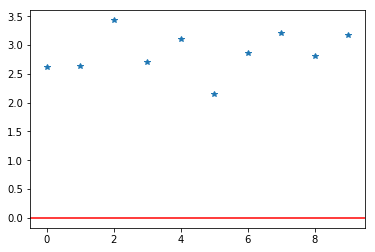

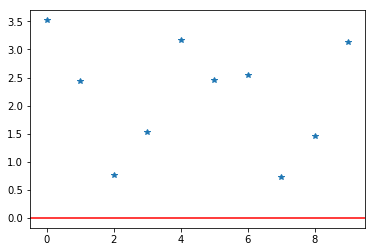

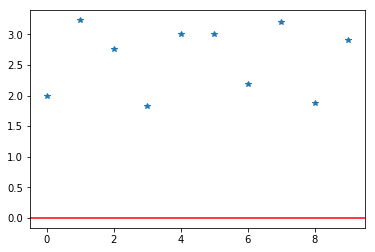

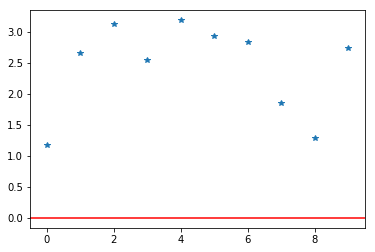

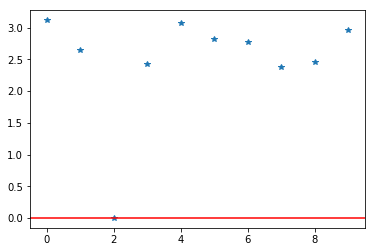

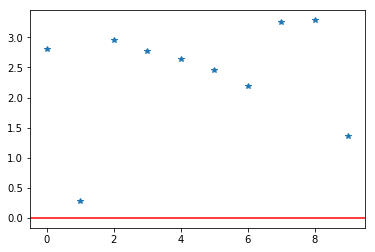

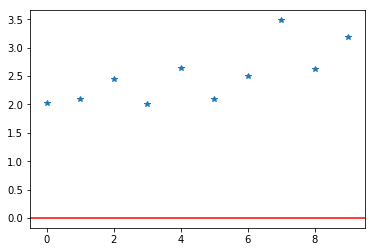

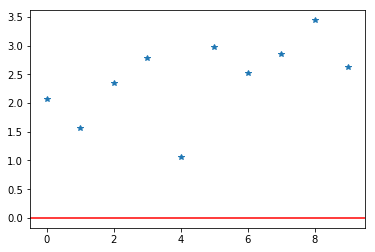

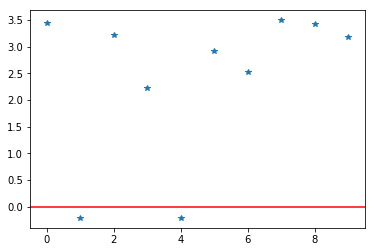

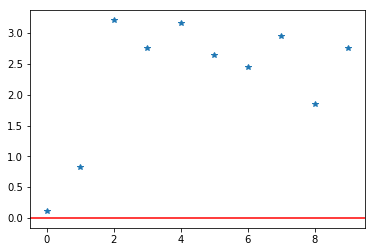

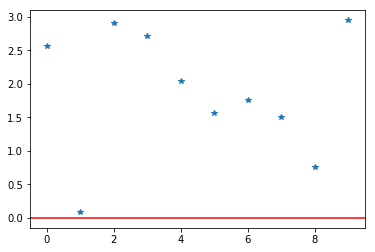

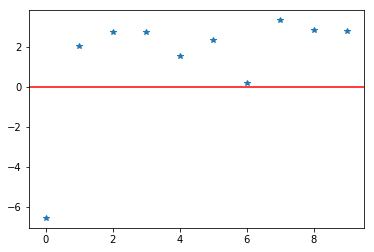

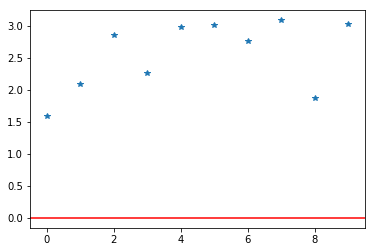

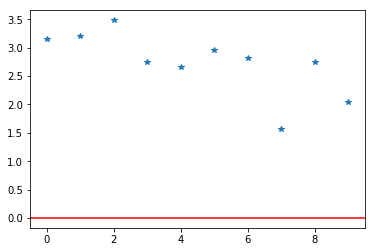

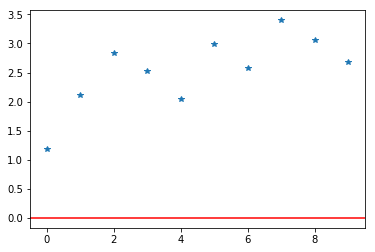

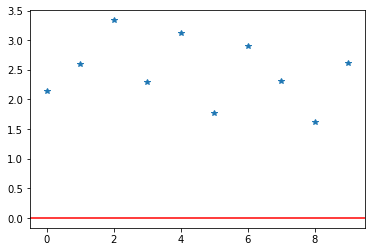

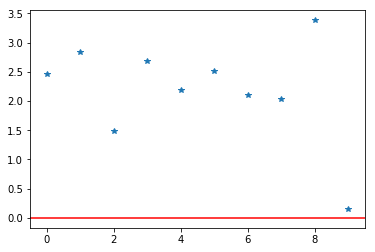

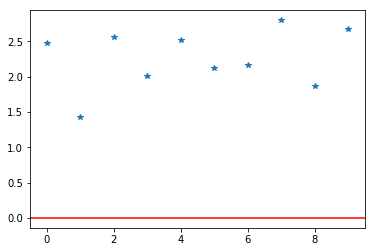

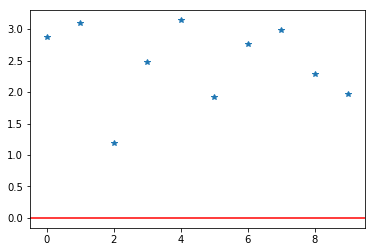

In [9]:
for f in range(F):
    plt.plot(range(T), scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()

In [13]:
smoothed_scores = smoothed_sample_anomalies(scores, halflife=2)

/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:307: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


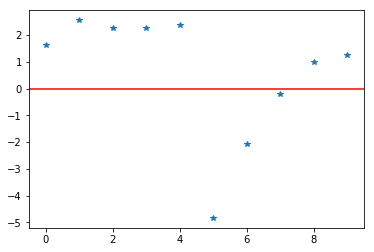

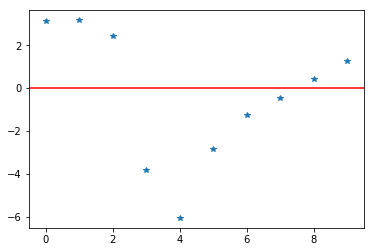

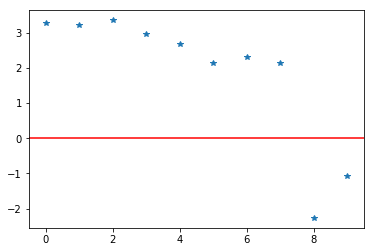

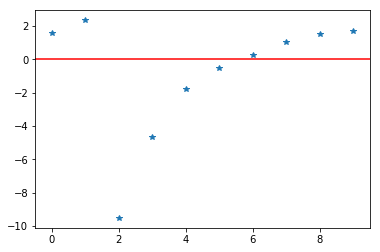

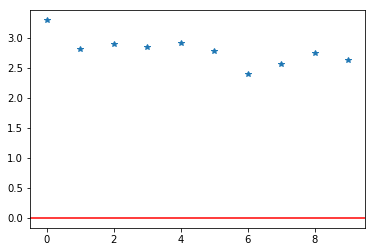

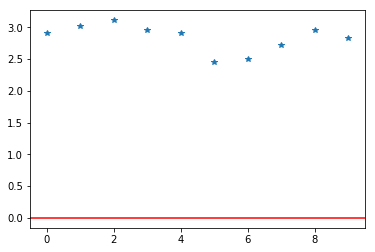

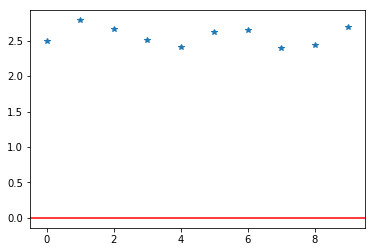

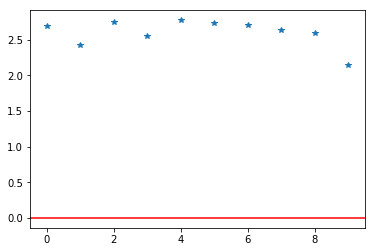

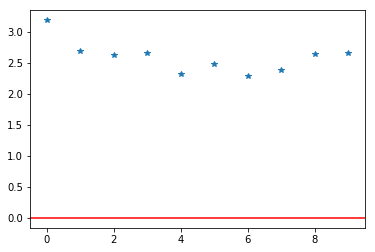

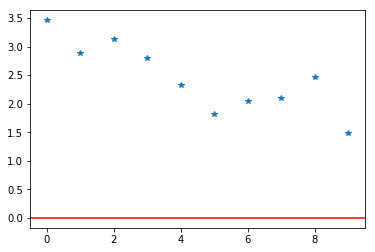

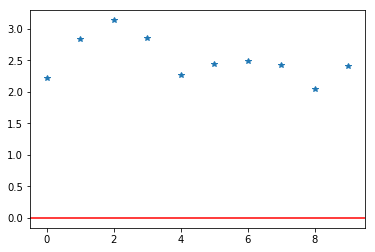

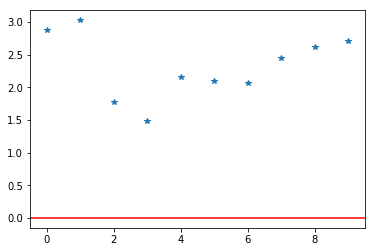

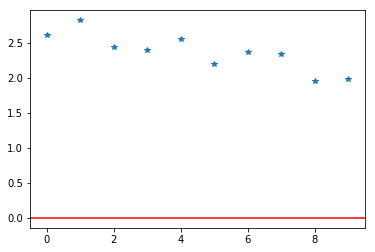

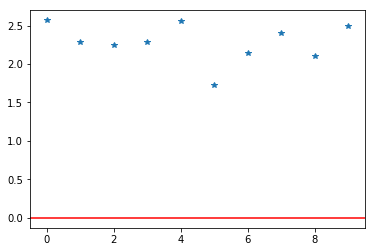

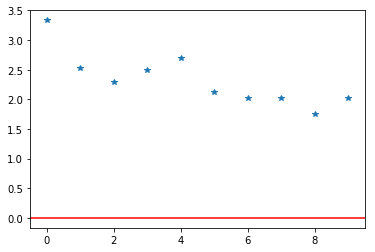

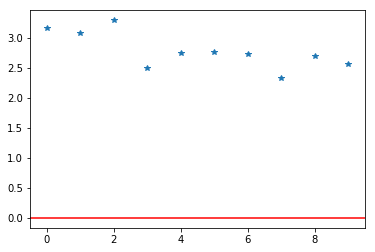

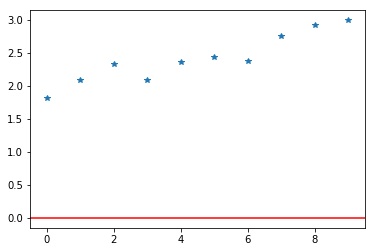

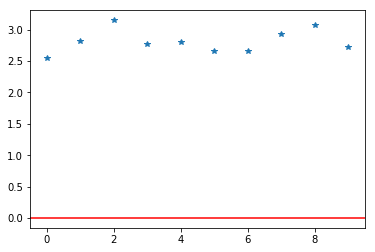

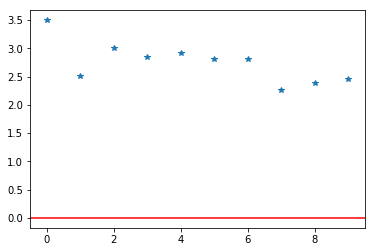

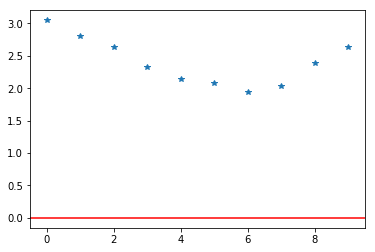

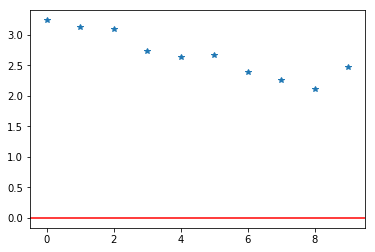

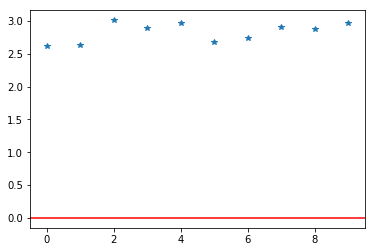

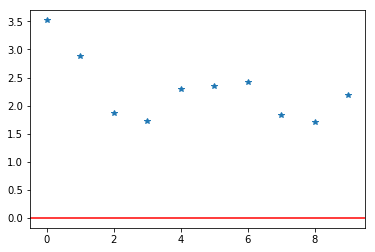

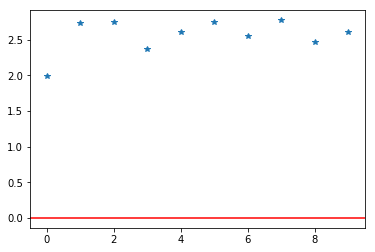

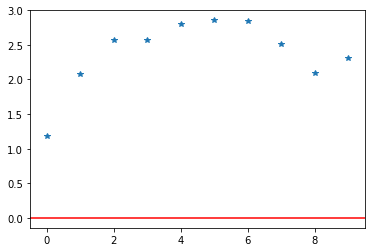

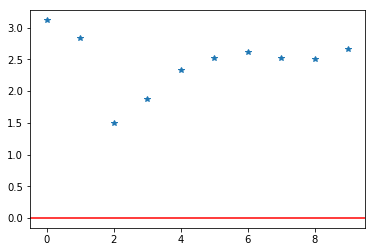

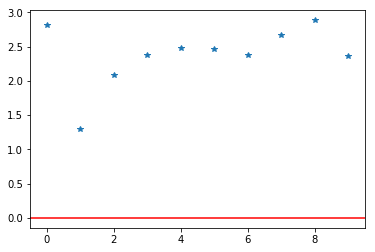

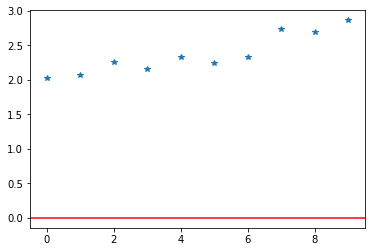

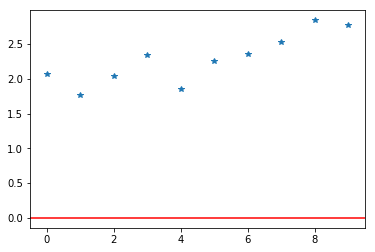

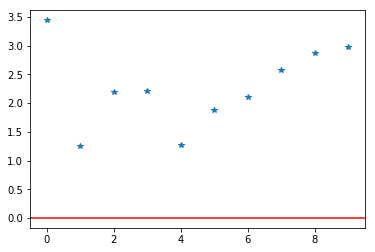

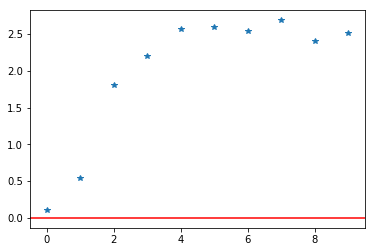

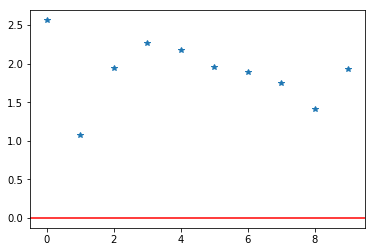

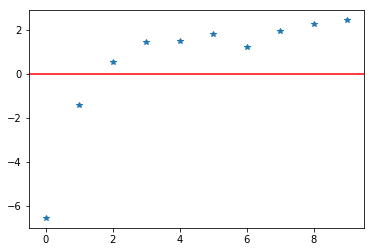

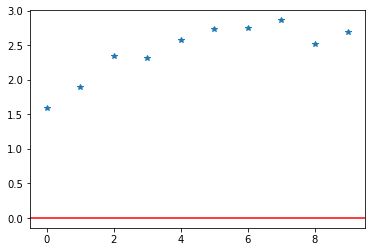

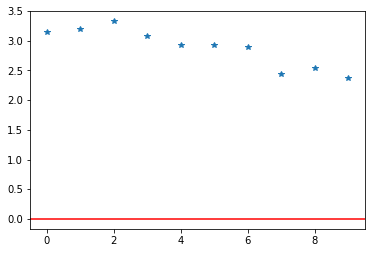

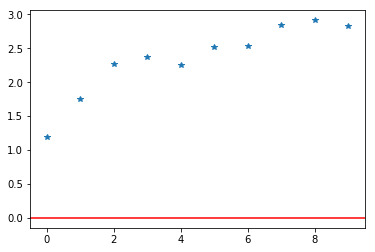

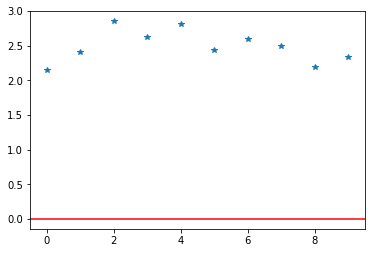

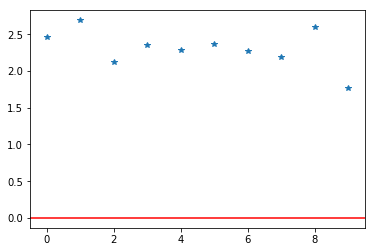

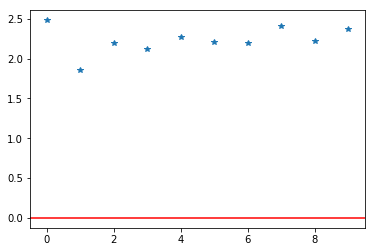

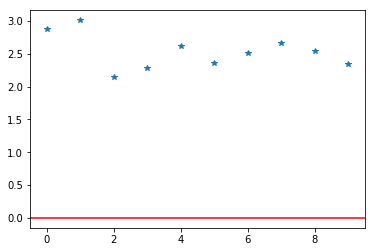

In [14]:
for f in range(F):
    plt.plot(range(T), smoothed_scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()

In [18]:
targets = smoothed_sample_anomalies(scores)

/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:307: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


In [19]:
targets.shape

(40, 10)

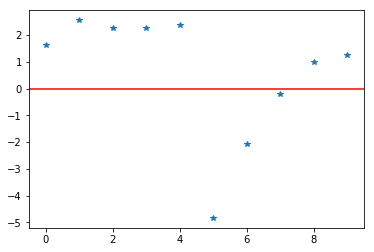

[ 1.6387338   2.5527021   2.27948269  2.27695057  2.36993704 -4.83747761
 -2.0762477  -0.22074346  1.00496361  1.25742951]


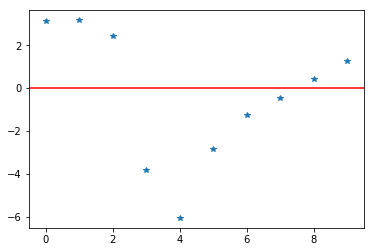

[ 3.13549277  3.16877029  2.44146378 -3.80329155 -6.0541233  -2.85826078
 -1.26133568 -0.45390488  0.43158708  1.25067245]


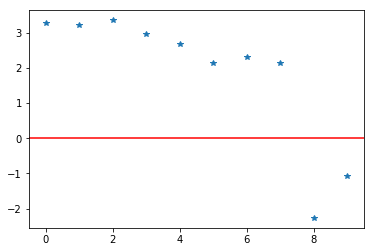

[ 3.26840967  3.22008781  3.35544566  2.97452914  2.69259595  2.13793675
  2.3143046   2.14408745 -2.26373499 -1.06538738]


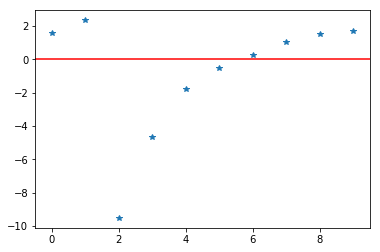

[ 1.6027263   2.34073197 -9.5141463  -4.66581262 -1.80599885 -0.49407768
  0.24480357  1.01105786  1.50011212  1.72445724]


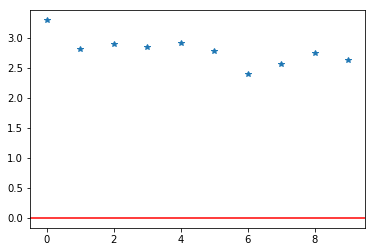

[3.29460953 2.81125744 2.90388552 2.85005403 2.90802672 2.77955384
 2.40518968 2.5619944  2.7529088  2.62524387]


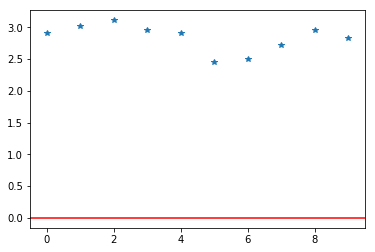

[2.90726199 3.01574607 3.11022425 2.95630295 2.90331276 2.45075437
 2.49498092 2.71984218 2.95086651 2.83851917]


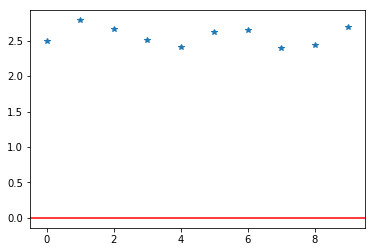

[2.4918435  2.78707629 2.6677617  2.51018536 2.4124182  2.61510916
 2.65455973 2.3928341  2.4379913  2.69431547]


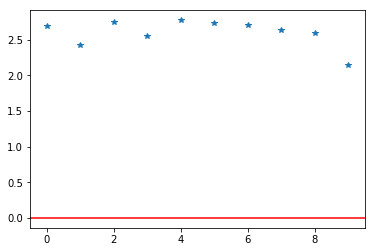

[2.69132663 2.4218394  2.74692811 2.55248388 2.77550994 2.73694756
 2.71087507 2.64063911 2.59442801 2.14780093]


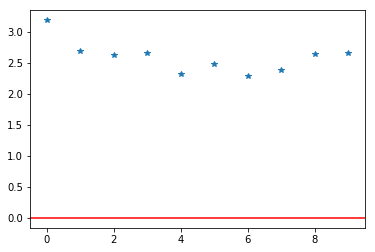

[3.18295992 2.6887866  2.62363916 2.65337959 2.31839009 2.48481603
 2.280856   2.38863272 2.63230588 2.64810611]


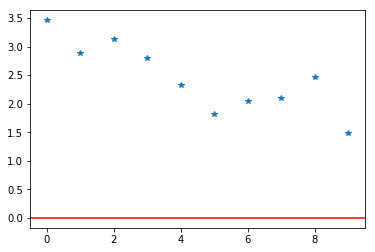

[3.46136416 2.88549678 3.13235535 2.80777548 2.31913808 1.8246822
 2.03946866 2.09791529 2.47255041 1.48044061]


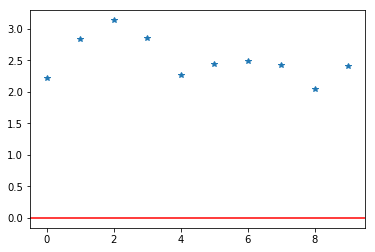

[2.22366696 2.83124048 3.13382633 2.84756747 2.2673399  2.44432199
 2.48602916 2.42531516 2.04523997 2.4096032 ]


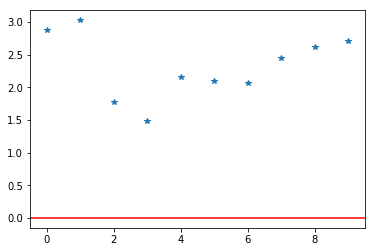

[2.87422081 3.02629683 1.78016311 1.48439483 2.1537358  2.09343615
 2.06155658 2.44074245 2.62288212 2.7134531 ]


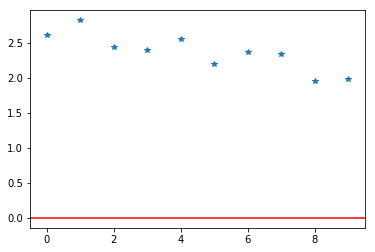

[2.61293929 2.82152011 2.4349146  2.392911   2.55896163 2.19235582
 2.36773849 2.33829416 1.94922373 1.98911278]


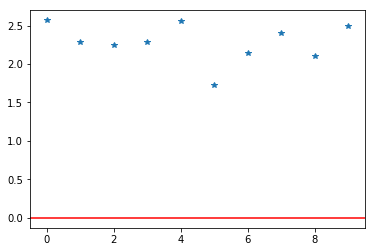

[2.56859374 2.28268962 2.24183418 2.28986555 2.55864105 1.73152734
 2.1435569  2.40648708 2.10816439 2.49111148]


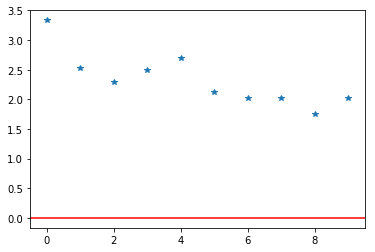

[3.33236041 2.52977306 2.28644111 2.49119218 2.68870885 2.12457732
 2.02710081 2.01947639 1.75162176 2.02347737]


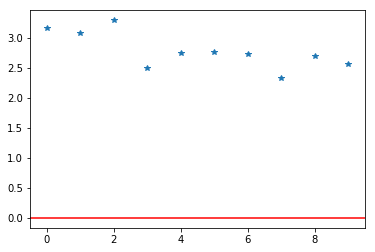

[3.16098494 3.08793059 3.29406845 2.49954439 2.75498074 2.76977939
 2.73400726 2.32400265 2.69663431 2.55752714]


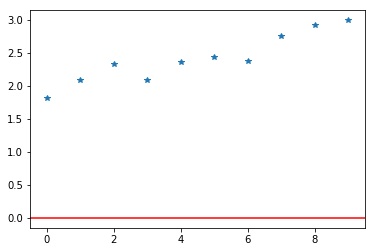

[1.81416588 2.09243262 2.33023829 2.08673458 2.36168852 2.43812511
 2.3789106  2.75394781 2.9161571  2.99578347]


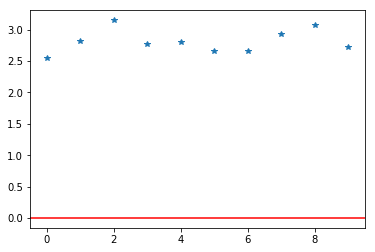

[2.54899986 2.81836423 3.1513039  2.77458484 2.80503921 2.65864061
 2.66595934 2.92567534 3.06846495 2.7193822 ]


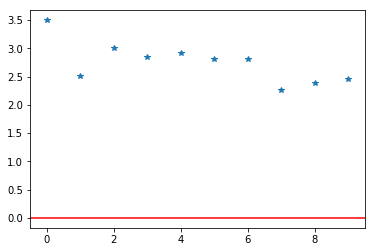

[3.4957774  2.51771724 3.00017007 2.8456011  2.91104575 2.80441509
 2.8133739  2.25476285 2.38276783 2.44857806]


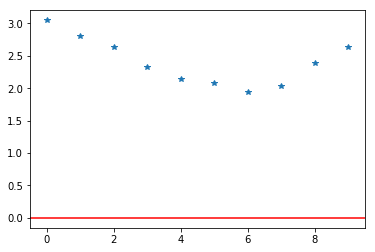

[3.04719387 2.80310107 2.62786313 2.33194465 2.14346745 2.08576407
 1.94395697 2.02716815 2.39326408 2.62977954]


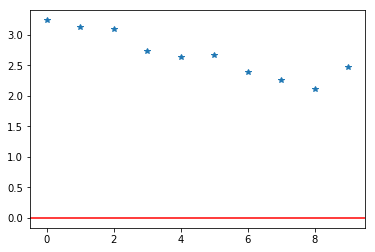

[3.24073051 3.12577635 3.09575404 2.74214539 2.63068302 2.66686265
 2.38924443 2.26714877 2.1125462  2.47794077]


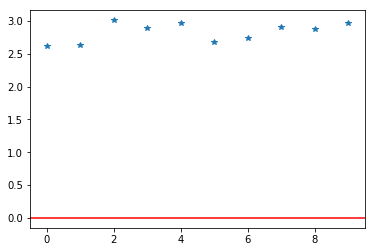

[2.61312448 2.63006298 3.00911007 2.88605951 2.97152532 2.67375554
 2.73834036 2.90324612 2.8708342  2.97144185]


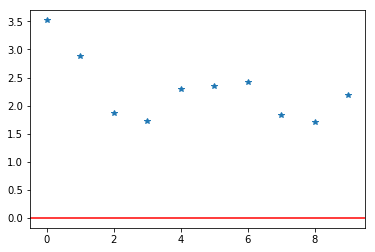

[3.52063008 2.87518201 1.87380073 1.73345651 2.28734168 2.34886088
 2.42037874 1.83099674 1.70322023 2.18704864]


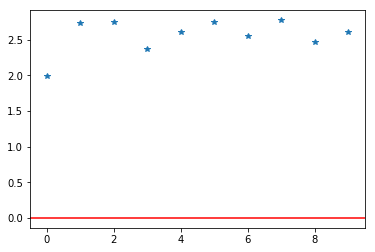

[1.98883789 2.73385064 2.75026735 2.36690962 2.61054049 2.75236747
 2.55197155 2.77514451 2.47020618 2.61670113]


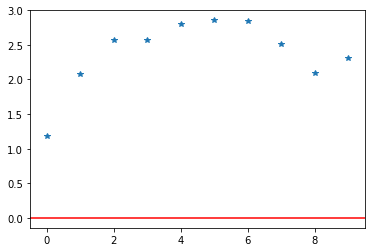

[1.18433796 2.07201688 2.57286555 2.56309056 2.80455845 2.85534841
 2.85049017 2.50797972 2.08946844 2.31324785]


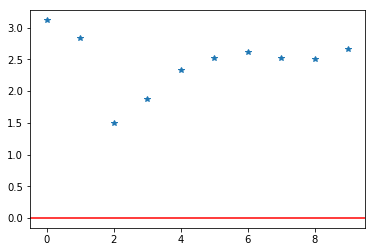

[3.1171714  2.83124594 1.4926918  1.87800379 2.33993455 2.51466139
 2.60860222 2.52749526 2.50286237 2.65866057]


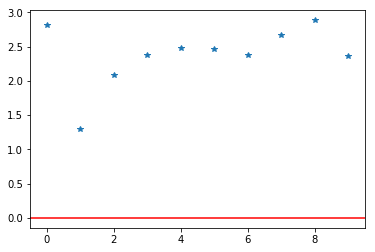

[2.80799504 1.29008699 2.08332704 2.37154678 2.4779636  2.46880508
 2.3696241  2.6743355  2.88335414 2.36810587]


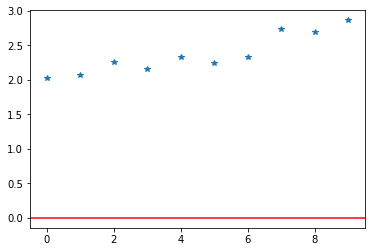

[2.02739794 2.06962886 2.25295343 2.15355692 2.33787124 2.24720234
 2.33393573 2.7326572  2.69452157 2.86387526]


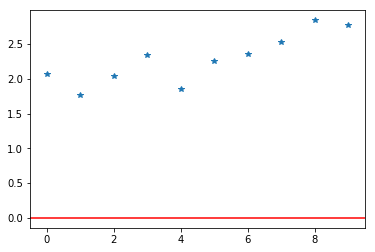

[2.07085791 1.77151217 2.04479587 2.34846219 1.85373486 2.2621499
 2.354166   2.52862519 2.84117358 2.77126814]


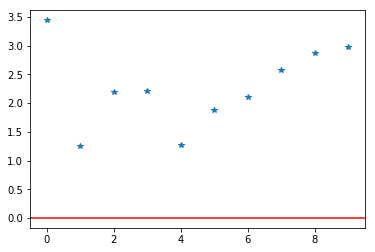

[3.44505017 1.25248955 2.18661307 2.20522911 1.2793391  1.87678964
 2.10428515 2.58615574 2.87087445 2.97791097]


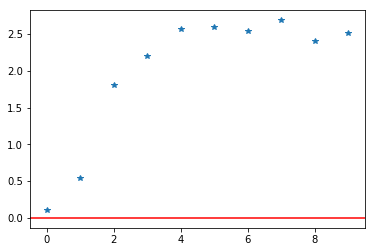

[0.11401224 0.54538586 1.80701867 2.20525911 2.57198942 2.59956209
 2.54457328 2.68670648 2.39876037 2.51949368]


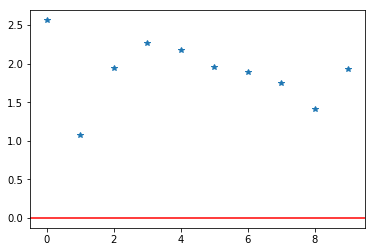

[2.56263004 1.07735407 1.94455169 2.26292227 2.17981908 1.95728475
 1.88577609 1.75505677 1.41202151 1.93402916]


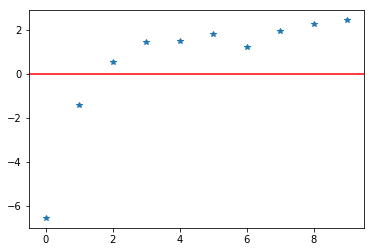

[-6.55019709 -1.39774882  0.55779427  1.45728819  1.49283626  1.79139315
  1.22399424  1.95088208  2.25132984  2.43445362]


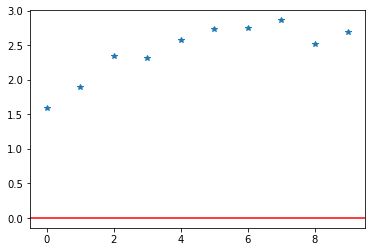

[1.58601807 1.8895223  2.34752493 2.31143508 2.56721917 2.72928015
 2.74195666 2.8600082  2.52210989 2.69097215]


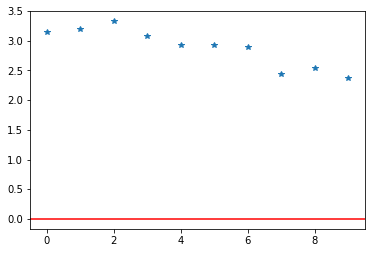

[3.1542636  3.18996732 3.32884108 3.08475212 2.92375927 2.93548876
 2.89219796 2.43354467 2.53886317 2.36996662]


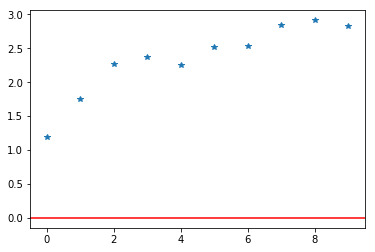

[1.18766061 1.74580655 2.26558592 2.37504897 2.24770281 2.51797667
 2.53808671 2.83650356 2.91259279 2.83103042]


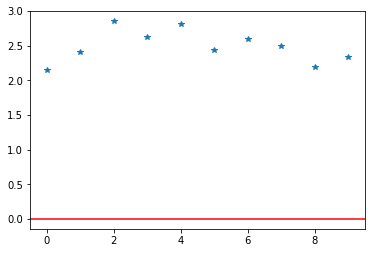

[2.14511927 2.41254795 2.85049097 2.61858157 2.80996847 2.43115796
 2.59601588 2.49438894 2.19755328 2.34117359]


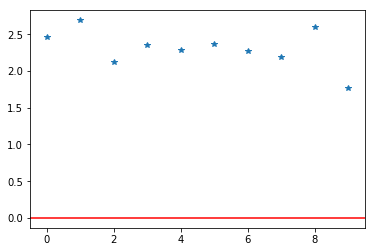

[2.4644227  2.6910543  2.12140546 2.35202264 2.28841973 2.37262668
 2.27694947 2.19094207 2.59823063 1.76877456]


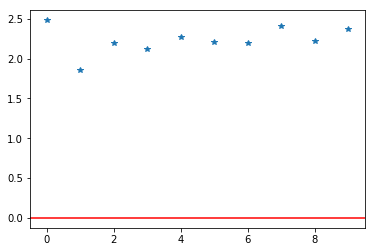

[2.4800654  1.8503962  2.18876596 2.11305104 2.26585634 2.21152608
 2.1923827  2.4017972  2.21634737 2.37267243]


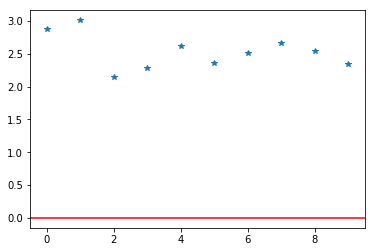

[2.87637207 3.01222665 2.14676314 2.28451431 2.61354447 2.36308233
 2.50689341 2.67279362 2.54273869 2.34666459]


In [20]:
targets2d = targets.reshape((40,10))
for f in range(F):
    plt.plot(range(T), smoothed_scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()
    print(targets2d[f])

### MNIST anomalies example

In [23]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

print('X размера', X_train.shape, 'y размера', y_train.shape)

X размера (50000, 1, 28, 28) y размера (50000,)


In [24]:
X_train = X_train.reshape(-1, 28, 28)

In [25]:
X_train.shape

(50000, 28, 28)

In [26]:
X_train4 = np.array([x for i, x in enumerate(X_train) if y_train[i] == 4])

выберем небольшой сэмпл

In [58]:
inds = np.random.choice(np.arange(len(X_train4)), size=1000, replace=False)
X_sample = X_train4[inds]
# y_sample = y_train[inds]

будем считать как время вертикальную ось и искать аномалии вдоль горизонтальных линий изображений. То есть пространство для поиска аномалий бинарные вектора длины 28

Если взять больше 5 компонент то может не сойтись: произойдет деградация существующих кластеров и sklearn скажет об этом

In [60]:
%%time
detector = GaussianMixtureInTimeAnomalyDetector(n_min=65, n_max=75, random_state=42,
                                                tol=1e-6)
scores = detector.fit(X_sample)

100%|██████████| 11/11 [01:46<00:00,  9.66s/it]
Best number of clusters (according to BIC) - 70.
Sample clusters fitting - OK.
100%|██████████| 1000/1000 [00:49<00:00, 20.09it/s]
Probabilities memorization - OK.


CPU times: user 2min 59s, sys: 42.8 s, total: 3min 42s
Wall time: 3min 17s


In [61]:
detector.bics

[-6519317.886909136,
 -6511944.671673294,
 -6511189.350147527,
 -6526565.33911086,
 -6513006.935941938,
 -6535705.998378585,
 -6528005.329827969,
 inf,
 inf,
 inf,
 inf]

сгладим оценки правдоподобия вдоль линии времени экспоненциальным сглаживанием с окном 7 строк (1/4)  высоты изображения

In [62]:
smoothed_scores = smoothed_sample_anomalies(scores, halflife=7)

/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:312: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=7,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


посмотрим топ 50 аномалий 

In [63]:
top_anomaly = detector.find_anomalies(smoothed_scores, 
                                      strategy='series', anomaly_top=0.05)[0][:20]

In [64]:
num_anomaly = np.array(np.array(top_anomaly)[:, 1], dtype=int)

In [65]:
num_anomaly

array([436, 707, 315, 837, 855, 192, 530, 889, 239, 375, 168, 129, 533,
        16, 386, 544, 670, 191, 607, 776])

In [66]:
%%time
from sklearn.manifold import TSNE

tr = TSNE(n_iter=1500)
X_trans = tr.fit_transform(X_sample.reshape(-1, 28 * 28))

CPU times: user 33 s, sys: 3.45 s, total: 36.4 s
Wall time: 38.3 s


In [67]:
X_trans = np.array(X_trans)

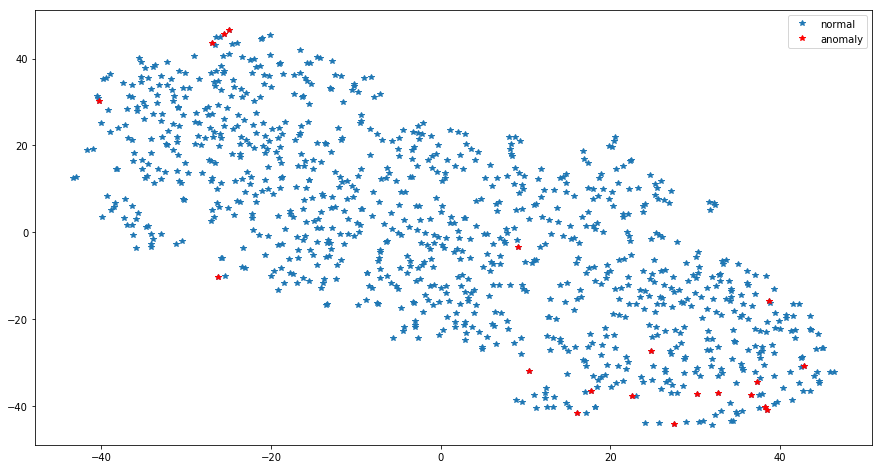

In [68]:
plt.figure(figsize=(15, 8))
plt.plot(X_trans[:, 0], X_trans[:, 1], '*', label='normal')
plt.plot(X_trans[num_anomaly, 0], X_trans[num_anomaly, 1], '*', color='r', label='anomaly')
plt.legend()
plt.show()

распределение правдоподобий:

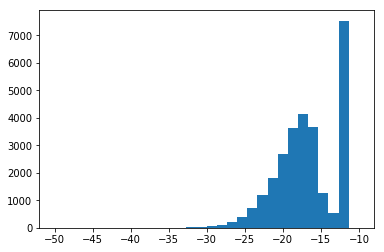

In [69]:
plt.hist(np.nan_to_num(scores.reshape(-1)), bins=30, range=(-50,-10))
plt.show()

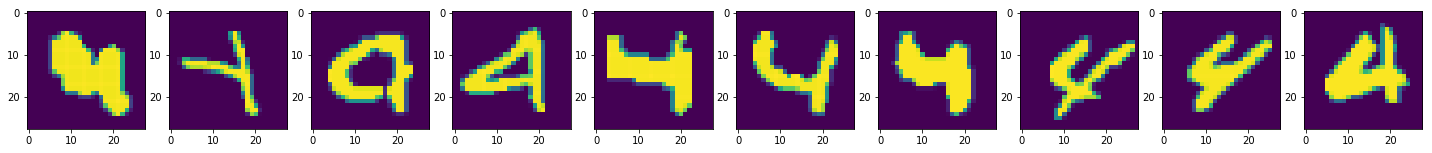

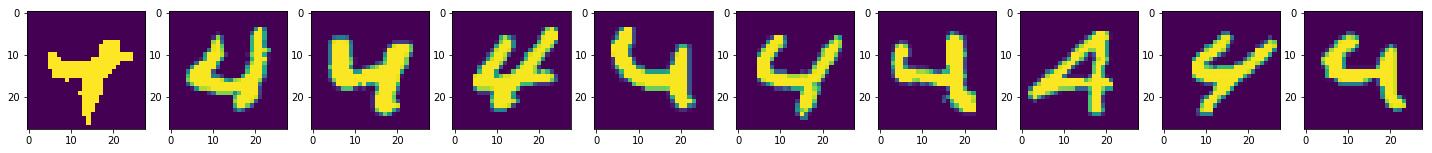

In [70]:
k=10
for i, item in enumerate(top_anomaly):
    if i % k == 0:
        plt.figure(figsize=(25, 10))
    num = item[1]
    score = item[0]
    plt.subplot(1, k, i % k + 1)
    plt.imshow(X_sample[num])
    if i % k == k - 1:
        plt.show()
#     print('index: {}, class: {}'.format(num, y_sample[num]))

In [71]:
all_anomaly = detector.find_anomalies(smoothed_scores, 
                                      strategy='series', anomaly_top=1)[0][-20:]

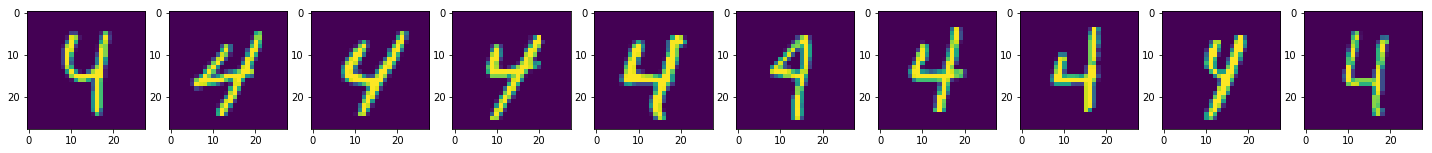

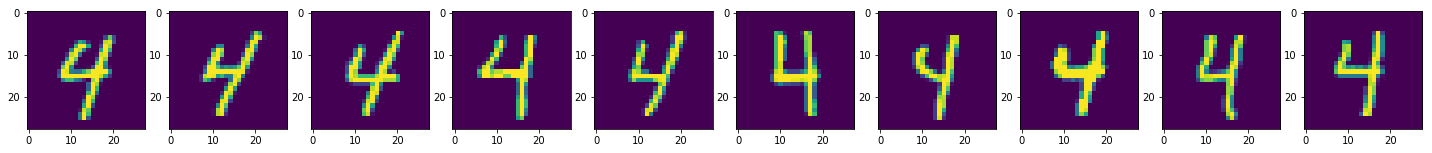

In [72]:
k=10
for i, item in enumerate(all_anomaly):
    if i % k == 0:
        plt.figure(figsize=(25, 10))
    num = item[1]
    score = item[0]
    plt.subplot(1, k, i % k + 1)
    plt.imshow(X_sample[num])
    if i % k == k - 1:
        plt.show()
#     print('index: {}, class: {}'.format(num, y_sample[num]))

можно взглянуть именно на те линии которые считаются наиболее аномальными

In [73]:
from skimage.color import gray2rgb
from collections import defaultdict

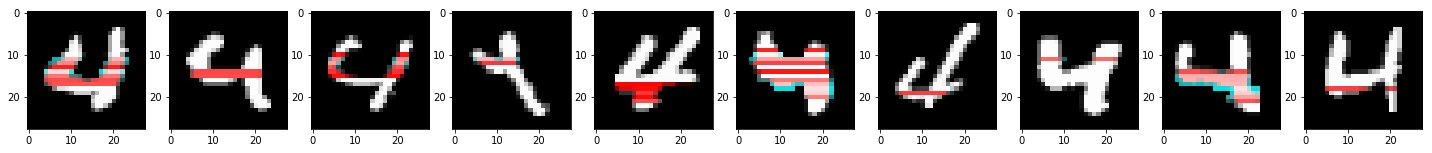

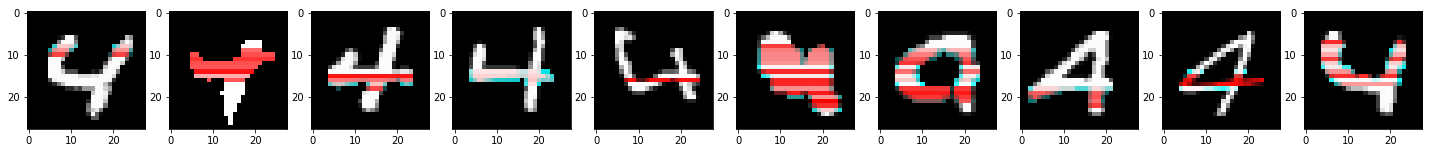

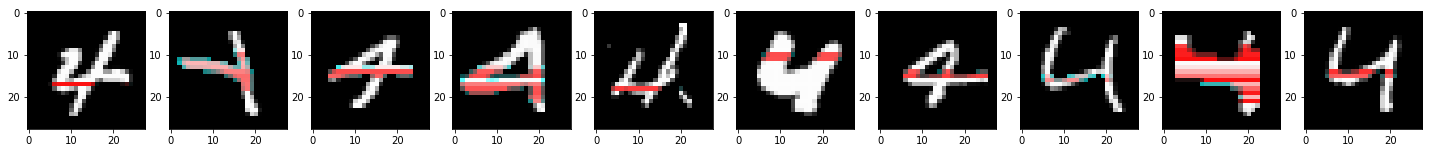

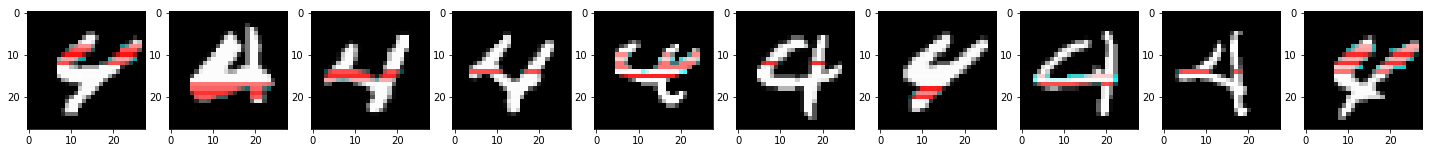

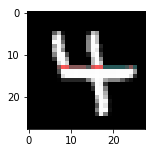

In [74]:
k=10
imgs = set()
lines = defaultdict(list)
for item in detector.find_anomalies(smoothed_scores, 
                                      strategy='sample', anomaly_top=0.05)[0]:
    
    num = item[1][0]
    line = item[1][1]
    score = item[0]
    lines[num].append((line, score))
    imgs.add(num)
    if len(imgs) > 40:
        break
        
for i, num in enumerate(imgs):
    img = gray2rgb(X_sample[num])
    if i % k == 0:
        plt.figure(figsize=(25, 10))
#     plt.subplot(1,2,1)
#     plt.imshow(img)
    for line,score in lines[num]:
        img[line-2][:, 1:3] = min(255, max(0, np.log(-score) * 20)) * (img[line-2][:, 1:3] > 0)
#         img[line-2][:, 0] /
#     plt.subplot(1,2,2)
#     plt.imshow(img)
#     plt.show()
    
    plt.subplot(1, k, i % k + 1)
    plt.imshow(img)
    if i % k == k - 1:
        plt.show()
#     print('index: {}, class: {}, bad_line: {}'.format(num, y_sample[num], line))

### NAB Traffic data example

In [120]:
frame2series = lambda df: pd.Series(df['value'], index=df.index)

travel = frame2series(pd.read_csv('realTraffic/TravelTime_387.csv', index_col='timestamp'))
speed = frame2series(pd.read_csv('realTraffic/speed_6005.csv', index_col='timestamp'))
occupancy = frame2series(pd.read_csv('realTraffic/occupancy_6005.csv', index_col='timestamp'))

 возьмем пересечение индексов(timestamp):

In [122]:
travel

timestamp
2015-07-10 14:24:00     564
2015-07-10 14:38:00     730
2015-07-10 14:48:00     770
2015-07-10 15:03:00     910
2015-07-10 15:22:00    1035
2015-07-10 15:32:00    1065
2015-07-10 15:42:00     953
2015-07-10 15:52:00    1005
2015-07-10 16:02:00     996
2015-07-10 16:12:00     901
2015-07-10 16:22:00     939
2015-07-10 16:32:00     988
2015-07-10 16:42:00    1020
2015-07-10 16:52:00     876
2015-07-10 17:02:00     870
2015-07-10 17:12:00     809
2015-07-10 17:22:00     884
2015-07-10 17:32:00     926
2015-07-10 17:42:00     829
2015-07-10 18:02:00     712
2015-07-10 18:12:00     624
2015-07-10 18:22:00     632
2015-07-10 18:32:00     596
2015-07-10 18:42:00     510
2015-07-10 18:52:00     526
2015-07-10 19:32:00      99
2015-07-10 19:42:00      85
2015-07-10 20:02:00      85
2015-07-10 20:12:00      87
2015-07-10 20:22:00      93
                       ... 
2015-09-17 12:31:00     127
2015-09-17 12:41:00     121
2015-09-17 12:51:00     131
2015-09-17 13:01:00     129
2015-09-17

In [111]:
for day in np.unq

In [112]:
travel_aggr

timestamp  timestamp  timestamp  timestamp
7          10         14         24            564
                                 38            730
                                 48            770
                      15         3             910
                                 22           1035
                                 32           1065
                                 42            953
                                 52           1005
                      16         2             996
                                 12            901
                                 22            939
                                 32            988
                                 42           1020
                                 52            876
                      17         2             870
                                 12            809
                                 22            884
                                 32            926
                                 42    